In [174]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
cnx = mysql.connector.connect(user = 'root',
                              password = 'Guerrero96',
                              host = '127.0.0.1',
                              database = 'module8',
                              auth_plugin = 'mysql_native_password'
                            )
cursor = cnx.cursor()

In [176]:
TrendFoodService = ( """SELECT YEAR(`index`), SUM(ReFoSeTotal)
                    FROM `etl`
                    GROUP BY YEAR(`index`);""") #sql command
                   
cursor.execute(TrendFoodService)
Year1 = []
Sales = []

for row in cursor.fetchall():
    Year1.append(row[0])
    Sales.append(row[1])
#Sales = np.array(Sales)
#Year1 = np.array(Year1)
#Sales = Sales.astype('int')
print(Sales)


[Decimal('1007776'), Decimal('6215073'), Decimal('6184582'), Decimal('5985075'), Decimal('5732863'), Decimal('5506136'), Decimal('5352218'), Decimal('5218529'), Decimal('5003332'), Decimal('4826390'), Decimal('4598302'), Decimal('4284968'), Decimal('4064476'), Decimal('4391580'), Decimal('4439733'), Decimal('4294359'), Decimal('4085746'), Decimal('3846605'), Decimal('3612457'), Decimal('3459077'), Decimal('3378906'), Decimal('3287537'), Decimal('3086990'), Decimal('2852956'), Decimal('2726131'), Decimal('2603794'), Decimal('2450628'), Decimal('2330235'), Decimal('2153095'), Decimal('2014102')]


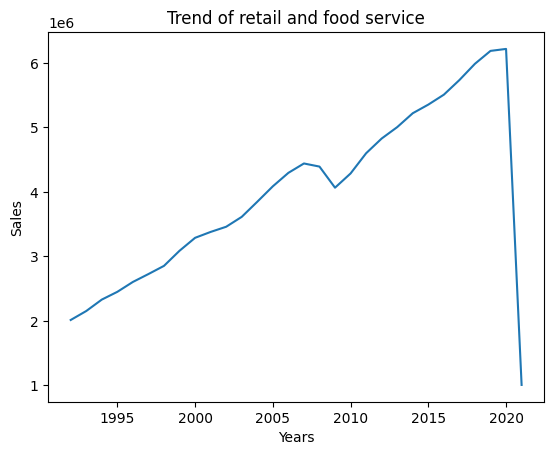

In [177]:
plt.plot(Year1,Sales) 
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Trend of retail and food service')
plt.show()

#### we can clearly see an increasing trend for Retails and food service sales

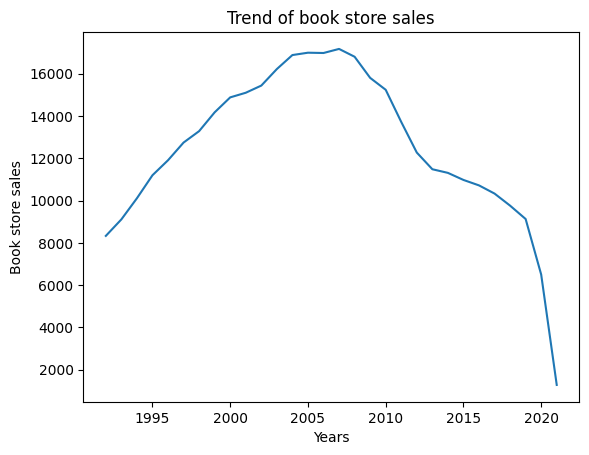

In [178]:
TrendFoodService = ( """SELECT YEAR(`index`), sum(Book_stores), sum(Sporting_goods_stores), sum(Hobby_toy_game_stores)
                    FROM etl
                    GROUP BY YEAR(`index`);""") #sql command
cursor.execute(TrendFoodService)
Year2 = []
SalesBookStore = []
SalesSportingGoods = []
SalesHobby = []

for row in cursor.fetchall():
    Year2.append(row[0])
    SalesBookStore.append(row[1])
    SalesSportingGoods.append(row[2])
    SalesHobby.append(row[3])

plt.plot(Year2,SalesBookStore)
plt.xlabel('Years')
plt.ylabel('Book store sales')
plt.title('Trend of book store sales')
plt.show()

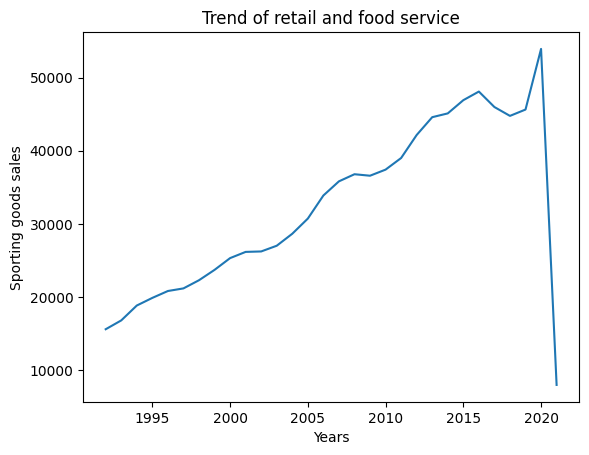

In [179]:
plt.plot(Year2,SalesSportingGoods)
plt.xlabel('Years')
plt.ylabel('Sporting goods sales')
plt.title('Trend of retail and food service')
plt.show()

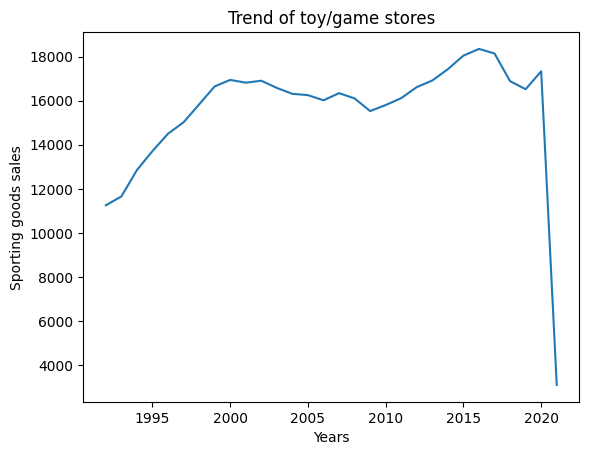

In [180]:
plt.plot(Year2,SalesHobby)
plt.xlabel('Years')
plt.ylabel('Sporting goods sales')
plt.title('Trend of toy/game stores')
plt.show()

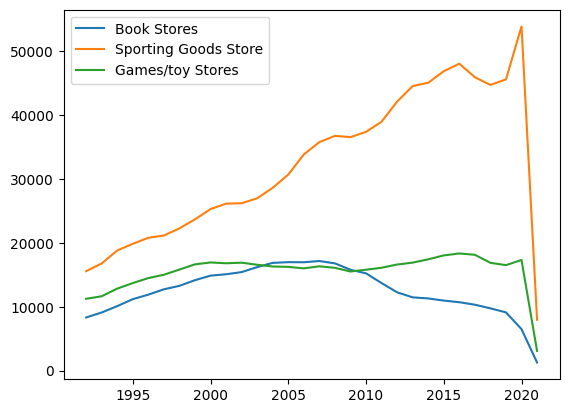

In [181]:
plt.plot(Year2, SalesBookStore, label = "Book Stores")
plt.plot(Year2, SalesSportingGoods, label = "Sporting Goods Store")
plt.plot(Year2, SalesHobby, label = "Games/toy Stores")
plt.legend()
plt.show()

#### retail and food service have the highest trend, grew faster and the highest of all three (Toy/game stores, Sporting goods, Book store)<br>
#### we can clearly see a drop in 2016-2017


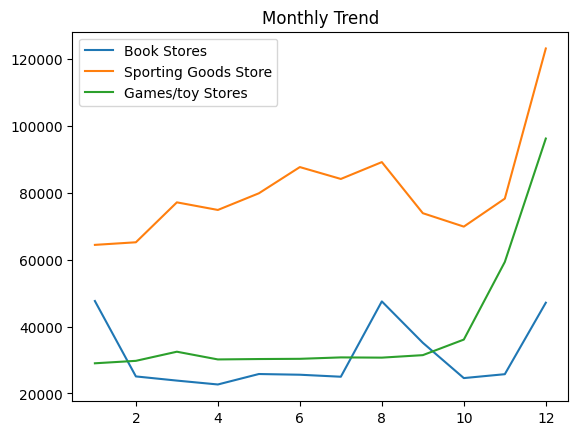

In [182]:
SeasonalTrend = ( """SELECT month(`index`), sum(Book_stores), sum(Sporting_goods_stores), sum(Hobby_toy_game_stores)
FROM etl
GROUP BY month(`index`);""") #sql command
cursor.execute(SeasonalTrend)

Month = []
MSalesBookStore = []
MSalesSportingGoods = []
MSalesHobby = []

for row in cursor.fetchall():
    Month.append(row[0])
    MSalesBookStore.append(row[1])
    MSalesSportingGoods.append(row[2])
    MSalesHobby.append(row[3])

plt.plot(Month, MSalesBookStore, label = "Book Stores")
plt.plot(Month, MSalesSportingGoods, label = "Sporting Goods Store")
plt.plot(Month, MSalesHobby, label = "Games/toy Stores")
plt.title('Monthly Trend')
plt.legend()
plt.show()



#### there is a seasonal pattern starting from october you can see a clear increase and it drops back in january

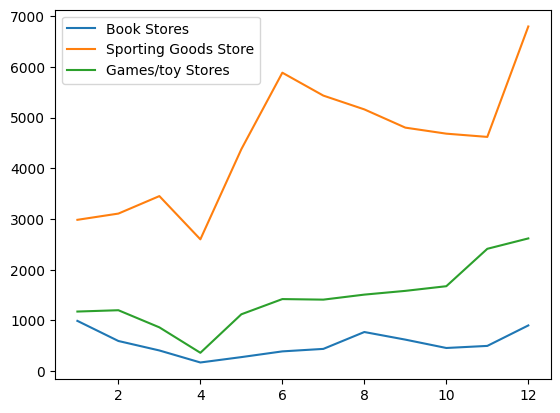

In [183]:
Trend2020 = ( """SELECT month(`index`)as 'month', sum(Book_stores) as 'Book stores', sum(Sporting_goods_stores) as 'Sporting goods stores', sum(Hobby_toy_game_stores) as 'Hobby game/toy stores'
            FROM etl
            WHERE YEAR(`index`) = '2020'
            GROUP BY month(`index`);""") #sql command
cursor.execute(Trend2020)
Year2020 = []
SalesBookStore2020 = []
SalesSportingGoods2020 = []
SalesHobby2020 = []

for row in cursor.fetchall():
    Year2020.append(row[0])
    SalesBookStore2020.append(row[1])
    SalesSportingGoods2020.append(row[2])
    SalesHobby2020.append(row[3])

plt.plot(Year2020, SalesBookStore2020, label = "Book Stores")
plt.plot(Year2020, SalesSportingGoods2020, label = "Sporting Goods Store")
plt.plot(Year2020, SalesHobby2020, label = "Games/toy Stores")
plt.legend()
plt.show()


#### We can clearly see a big increase in Sporting Goods Stores related to the pandemic and people wanting to start some hobbies

In [184]:
PercentageChangeM = ( """SELECT month(`index`)as 'month', sum(Men_clothing_stores), sum(Women_clothing_stores) 
            FROM etl
            GROUP BY month(`index`);""") #sql command
cursor.execute(PercentageChangeM)
Month2 = []
MenClothingStoresM = []
WomenenClothingStoresM = []

for row in cursor.fetchall():
    Month2.append(row[0])
    MenClothingStoresM.append(row[1])
    WomenenClothingStoresM.append(row[2])
PerChangeM = pd.DataFrame({'Month': Month2,'MenClothing': MenClothingStoresM, 'WomenClothing': WomenenClothingStoresM })
Change = PerChangeM.pct_change()
Change.rename(columns = {'MenClothing':'MenClothingPer', 'WomenClothing' : 'WomenClothingPer'}, inplace=True)
Change.drop(columns=['Month'], axis = 1, inplace=True)
result = pd.concat([PerChangeM,Change],axis=1)
result.replace(np.nan,0, inplace=True)
result



,Month,MenClothing,WomenClothing,MenClothingPer,WomenClothingPer
0,1,17987,65192,0,0
1,2,17566,70779,-0.0234057930727747817868460555,0.085700699472327892993005277
2,3,19635,85396,0.117784356142548104292383013,0.206516057022563189646646604
3,4,20824,85954,0.060555131143366437484084543,0.006534263899948475338423345
4,5,21494,89222,0.032174414137533615059546677,0.038020336459036228680456989
5,6,20800,81486,-0.0322880803945287056853075277,-0.0867050727399071977763331914
6,7,18866,77305,-0.0929807692307692307692307692,-0.0513094273862994870284466043
7,8,20318,82528,0.076963850312731898653662674,0.067563546989198628807968437
8,9,19835,81073,-0.0237720248055911014863667684,-0.0176303799922450562233423808
9,10,21150,85292,0.066296949836148222838416940,0.052039519938820569116721967


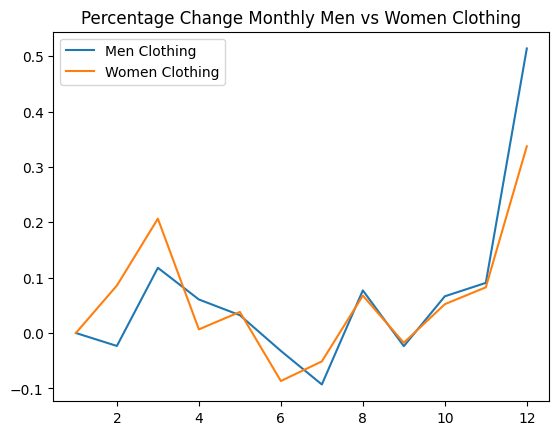

In [188]:
y = result.Month
Men = result.MenClothingPer
Women = result.WomenClothingPer

plt.plot(y, Men , label = "Men Clothing")
plt.plot(y, Women, label = "Women Clothing")
plt.legend()
plt.title('Percentage Change Monthly Men vs Women Clothing')
plt.show()


In [190]:
PercentageChangeY = ( """SELECT Year(`index`)as 'month', sum(Men_clothing_stores), sum(Women_clothing_stores) 
                    FROM etl
                    GROUP BY Year(`index`);""") #sql command
cursor.execute(PercentageChangeY)
Month3 = []
MenClothingStoresY = []
WomenenClothingStoresY = []

for row in cursor.fetchall():
    Month3.append(row[0])
    MenClothingStoresY.append(row[1])
    WomenenClothingStoresY.append(row[2])
PerChangeM = pd.DataFrame({'Month': Month3,'MenClothing': MenClothingStoresY, 'WomenClothing': WomenenClothingStoresY })
Change = PerChangeM.pct_change()
Change.rename(columns = {'MenClothing':'MenClothingPer', 'WomenClothing' : 'WomenClothingPer'}, inplace=True)
Change.drop(columns=['Month'], axis = 1, inplace=True)
result2 = pd.concat([PerChangeM,Change],axis=1)
result2.replace(np.nan,0, inplace=True)
result2

,Month,MenClothing,WomenClothing,MenClothingPer,WomenClothingPer
0,2021,702,4112,0,0
1,2020,3849,26164,4.482905982905982905982905983,5.362840466926070038910505837
2,2019,9110,38951,1.366848532086256170433878930,0.488724965601589970952453753
3,2018,9222,39847,0.012294182217343578485181120,0.023003260506790583040230033
4,2017,9296,39212,0.008024289741921492084146606,-0.0159359550279820312696062439
5,2016,9281,39751,-0.0016135972461273666092943201,0.013745792104457819034989289
6,2015,9399,40239,0.012714147182415687964658981,0.012276420718975623254760887
7,2014,9251,41019,-0.0157463559953186509203106713,0.019384179527324237679862820
8,2013,8850,41508,-0.0433466652253810398875797211,0.011921304761208220580706502
9,2012,8272,41794,-0.0653107344632768361581920904,0.006890238026404548520767081


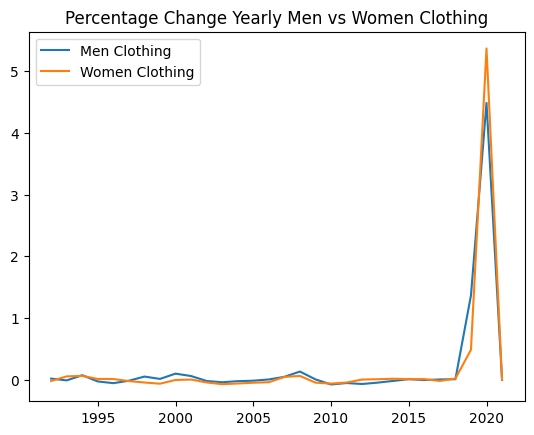

In [192]:
y = result2.Month
Men = result2.MenClothingPer
Women = result2.WomenClothingPer

plt.plot(y, Men , label = "Men Clothing")
plt.plot(y, Women, label = "Women Clothing")
plt.legend()
plt.title('Percentage Change Yearly Men vs Women Clothing')
plt.show()

#### there is a clear increase in consumption from 2019 to 2020

With this analysis, we can definitely see a seasonal pattern, we can see how consumption has increased in general. And there seems no pattern to determine that his will decrease. With a clear interruption in the tendency during the pandemic

cursor.close()
cnx.close